# [Homework Week 7](https://tsoo-math.github.io/ucl2/2021-HW-week7.html)

For complete written solutions, please [see](https://tsoo-math.github.io/ucl/QHW2-sol.html).  We will mainly be concerned with the Python code here, and Question 8.

## Poisson random variables

In [1]:
import numpy as np


def probpois(n, L):                # defines the probability mass function of a Poisson with mean L
    p = np.exp(-L) * (L**n) / np.math.factorial(n)
    return p

def cumpois(n,L):
    sum = 0
    for i in range(n+1):
        sum = sum + probpois(i,L)
    return sum

print(cumpois(2,4))
print(np.random.uniform())

0.2381033055535443
0.1693386176305406


In [2]:
def poisrv(L):
    u = np.random.uniform()
    m=-1
    i=0
    while m==-1:
        if (u < cumpois(i,L)):
            m=i
        i = i+1
    return m


z = [poisrv(2.57)  for _ in range(10000)]  # generates 10000 Poisson random variables with mean 2.57
print(np.mean(z))                          # basic checks, recall that the mean = variance for a Poisson
print(np.std(z) **2)




2.5799
2.6970159899999997


## Inverse transform method

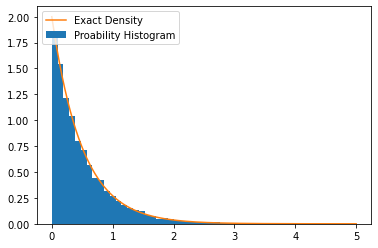

In [3]:
def inverseT(y, L):
    return -np.log(1-y) /L
def exprv(L):
    return inverseT(np.random.uniform(),L)

z=  [exprv(2)  for _ in range(10000)]

import matplotlib.pyplot as plt

plt.hist(z, bins = 50, density=True, label='Proability Histogram') 
t=np.linspace(0,5,num=2000)
plt.plot(t,2*np.exp(-2*t), label='Exact Density')
plt.legend(loc='upper left')
plt.show()

## The value of $\pi$

In [4]:
def pointtrack(N):
    n=0
    k=1
    while(k < N+1):
        x= 2*np.random.uniform()-1
        y = 2*np.random.uniform()-1
        if (x**2 + y**2 <1):
            n=n+1
        k = k+1
    return n/N

print(pointtrack(100000) * 4)
print(np.math.pi)

3.13868
3.141592653589793


## Acceptance/Rejection

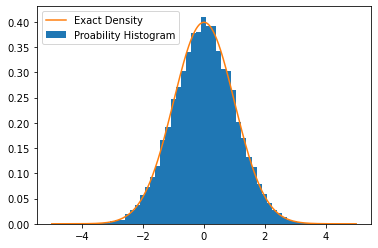

In [5]:
def dposN(x):
    return 2/ np.sqrt(2 * np.math.pi)   *  np.exp(-x**2 /2)

def ar():
    u = 2
    w = 0
    while(u > w):
        u = np.random.uniform()
        y = np.random.exponential()
        w = dposN(y) / (2*np.exp(-y))
        if (u <w):
            break
    return y

def arfix():
    return (2*np.random.binomial(1,0.5,1)-1)*ar()


z=  [arfix()[0]  for _ in range(10000)]


import matplotlib.pyplot as plt

plt.hist(z, bins = 50, density=True, label='Proability Histogram') 
t=np.linspace(-5,5,num=2000)
plt.plot(t,1/np.sqrt(2 * np.math.pi)*np.exp(-(t**2)/2), label='Exact Density')
plt.legend(loc='upper left')
plt.show()

## Simple card shuffling

In [6]:
import random

deck = list( range(1,53))
print(deck)
print(deck[51])
print(deck[0])


print (random.sample(range(1,53), 2) )



def shuffle(x):
    t=random.sample(range(1,53), 2)
    a= t[0]
    b= t[1]
    da = x[a-1]
    db = x[b-1]
    x[a-1]=db
    x[b-1]=da
    return x

print (shuffle(deck))
    
    

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]
52
1
[25, 27]
[1, 2, 3, 4, 5, 6, 7, 8, 28, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 9, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


## The arrow of time

A stationary distribution is given by taking the (discrete) uniform distribution $\pi$ on the states $1, \ldots, 15$.  Let $P$ be the transition matrix.  We can readily check the required property; for example for $ 1 < i< 14$, we have

$$ (\pi P)_i = \pi_{i-1} (0.9) + \pi_{i+1}(0.1) = \tfrac{0.9}{15} + \tfrac{0.1}{15} = \tfrac{1}{15} = \pi_i.$$

This Markov chain is clearly not reversible; if we were to draw the  Markov chain on  a circle, it obviously tends to  move in one direction.  Using a version of the  previous exercise on reversibilty, towards a contradiction, we easily see that if there exists a reversible probability distribution $\rho$, then if the Markov chain is started with distribution $\rho$, we have 

$$\mathbb{P}(X_0 = 1, X_1=2, X_2=3, \ldots, X_{14}=15, X_{15}=1) = \mathbb{P}(X_0=1, X_2=15, X_2=14, \ldots, X_{15}=1);$$

this equation clearly does *not* hold.  The left hand side is 
$$\rho_1 (0.9)^{15}$$
and the right hand side is
$$\rho_1 (0.1)^{15}.$$
Thus $\rho_1=0$ and a similar argument applies in more generality to show that $\rho_i=0$, which is absurd, since $\rho$ was assumed to be a probability measure.

## Endnotes

Use the ipynb [source](https://tsoo-math.github.io/ucl2/2021-hw-week7.ipynb) for the most update version.

In [7]:
from datetime import datetime
print(datetime.now())

2021-10-15 00:44:18.192541
